<a href="https://colab.research.google.com/github/Achronaz/cs4186cp/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#enable GPU
!export CUDA_VISIBLE_DEVICES=0
!nvidia-smi

Wed Apr 21 09:59:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install gdown
#download darknet
%cd /content/
!rm -rf darknet
!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet
# build darknet
!sed -i s/GPU=0/GPU=1/g Makefile
!sed -i s/CUDNN=0/CUDNN=1/g Makefile
!sed -i s/CUDNN_HALF=0/CUDNN_HALF=1/g Makefile
!sed -i s/OPENCV=0/OPENCV=1/g Makefile
!make 

/content
Cloning into 'darknet'...
remote: Enumerating objects: 14956, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 14956 (delta 1), reused 2 (delta 0), pack-reused 14949
Receiving objects: 100% (14956/14956), 13.39 MiB | 17.69 MiB/s, done.
Resolving deltas: 100% (10164/10164), done.
/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunuse

In [3]:
%cd /content/darknet/
# download pretrained model (custom5-512.weights)
!gdown https://drive.google.com/u/0/uc?id=1foQ7F2U48bhxtOG9SUXfmY0xaJFHbTWb

# download dataset
%cd /content/darknet/data/
!gdown https://drive.google.com/u/0/uc?id=15H9e9jxeSlQ2FIygwrdF-jCRezTWsy83
!unzip dataset.zip

!cp /content/darknet/data/custom/custom5.cfg /content/darknet/custom5.cfg
!cp /content/darknet/data/custom/custom5.data /content/darknet/custom5.data

串流輸出內容已截斷至最後 5000 行。
  inflating: custom/hamburger/285069.txt  
  inflating: custom/hamburger/285384.jpg  
  inflating: custom/hamburger/285384.txt  
  inflating: custom/hamburger/286323.jpg  
  inflating: custom/hamburger/286323.txt  
  inflating: custom/hamburger/2863754.jpg  
  inflating: custom/hamburger/2863754.txt  
  inflating: custom/hamburger/2874704.jpg  
  inflating: custom/hamburger/2874704.txt  
  inflating: custom/hamburger/2875062.jpg  
  inflating: custom/hamburger/2875062.txt  
  inflating: custom/hamburger/2877643.jpg  
  inflating: custom/hamburger/2877643.txt  
  inflating: custom/hamburger/2879938.jpg  
  inflating: custom/hamburger/2879938.txt  
  inflating: custom/hamburger/2882999.jpg  
  inflating: custom/hamburger/2882999.txt  
  inflating: custom/hamburger/2884546.jpg  
  inflating: custom/hamburger/2884546.txt  
  inflating: custom/hamburger/2891622.jpg  
  inflating: custom/hamburger/2891622.txt  
  inflating: custom/hamburger/2894838.jpg  
  inflating: cus

In [8]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

/content/darknet
--2021-04-21 10:08:07--  https://assets.biggreenegg.eu/app/uploads/2017/12/05133526/topimage-mango-filled-hamburgers-800x500.jpg
Resolving assets.biggreenegg.eu (assets.biggreenegg.eu)... 99.86.38.48, 99.86.38.13, 99.86.38.118, ...
Connecting to assets.biggreenegg.eu (assets.biggreenegg.eu)|99.86.38.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89157 (87K) [image/jpeg]
Saving to: ‘topimage-mango-filled-hamburgers-800x500.jpg’

topimage-mango-fill 100%[===================>]  87.07K   365KB/s    in 0.2s    

2021-04-21 10:08:08 (365 KB/s) - ‘topimage-mango-filled-hamburgers-800x500.jpg’ saved [89157/89157]

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 

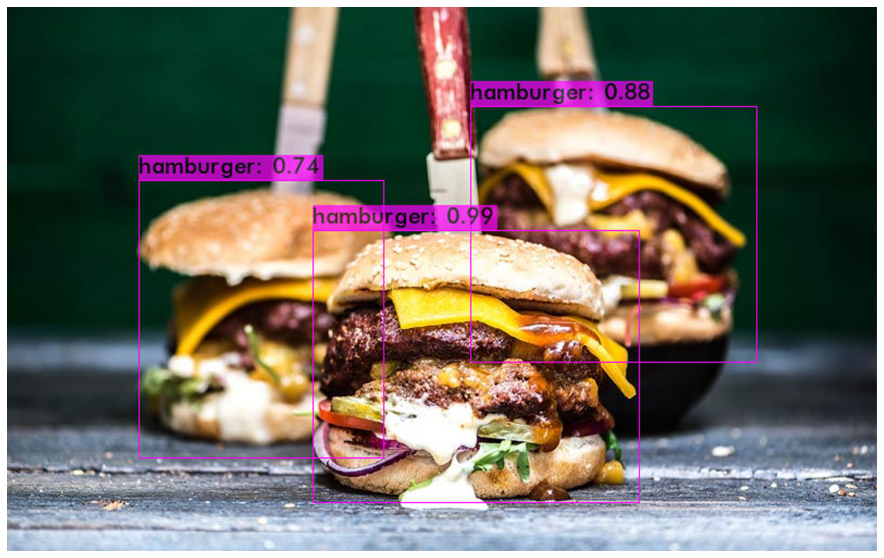

In [9]:
%cd /content/darknet/
!wget https://assets.biggreenegg.eu/app/uploads/2017/12/05133526/topimage-mango-filled-hamburgers-800x500.jpg
!mv topimage-mango-filled-hamburgers-800x500.jpg burger1.jpg
!./darknet detector test custom5.data custom5.cfg custom5-512.weights burger1.jpg
imShow('predictions.jpg')